# Step 1 - Setup

In [ ]:
# Import the userdata module from Google Colab
from google.colab import userdata
# Retrieve the API key stored under 'genai_course' from Colab's userdata
api_key = userdata.get('genai_course')

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to this folder
%cd /content/drive/MyDrive/GenAI/RAG/Multimodal RAG

/content/drive/MyDrive/GenAI/RAG/Multimodal RAG


# Step 2 - Get the data

In [ ]:
# Define the Video Path
video_path = "decision-making-course.mp4"

# Step 3 - Extract the Audio and Compress

In [ ]:
# Install libraries for audio processing and  handling multimedia files
!pip install -q pydub
!apt-get install -q ffmpeg

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Import Libraries
import os
import subprocess
from pydub import AudioSegment

In [ ]:
# Define the audio path
audio_output_path = "audios/output.mp3"

In [ ]:
# Ensure the output directory exists
output_dir = os.path.dirname(audio_output_path)
# Create the directory if it does not already exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Ensure the output file has the correct extension
if not audio_output_path.endswith(".mp3"):
    audio_output_path += ".mp3"

In [ ]:
# Construct the ffmpeg command to extract the audio
command = [
    'ffmpeg',
    '-y', # overwrites if the audio exists
    '-i', video_path, # input file
    '-vn', # No video
    '-acodec', 'libmp3lame', # Audio codecs
    audio_output_path # output file
]

In [ ]:
# execute the command to extract the audio
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'decision-making-course.mp4', '-vn', '-acodec', 'libmp3lame', 'audios/output.mp3'], returncode=0)

In [ ]:
# Set the bitrate
bitrate = "32k"

In [ ]:
# Set path for compressed audio
compressed_audio_path = "audios/compressed.mp3"

In [ ]:
# Construct the ffmpeg command to compress the audio
command = [
    'ffmpeg',
    '-y',                    # Overwrite output file if it exists
    '-i', audio_output_path, # Input audio file path
    '-ab', bitrate,          # Audio bitrate for compression
    compressed_audio_path    # Output compressed audio file path
]

# Execute the ffmpeg command to compress the audio
subprocess.run(command, check=True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'audios/output.mp3', '-ab', '32k', 'audios/compressed.mp3'], returncode=0)

# Step 4 - Transcribe Audio using OpenAI API

In [ ]:
# Install the openAI library
! pip install -q openai

In [ ]:
# Import OpenAI library
from openai import OpenAI

In [ ]:
# Connect to the OpenAI API
client = OpenAI(api_key = api_key)

In [ ]:
# Open the compressed audio file in binary mode
with open(compressed_audio_path, "rb") as file:
    # Use the Whisper model to transcribe the audio
    transcript = client.audio.transcriptions.create(
        model="whisper-1",    # Specify the model to use for transcription
        file=file             # Provide the audio file for transcription
    )

In [ ]:
# Inspect the transcript
transcript.text

"Are you looking to improve the way that you make decisions? Do you sometimes worry that you don't have all the tools to make the best calls? Or even when you hear other people at work, you sometimes feel, hmm, that does not feel like the right decision, but at the same time, you cannot explain why. Well, I think you are in the right place. In the next one hour, you will have a crash course on decision making, problem solving and critical thinking. I'm going to share with you framework thinking, how we make decisions and cognitive biases. I'm going to show you some very well-known frameworks like system one and system two thinking, loss aversion and even some cognitive biases like anchoring bias or confirmation bias. By the end of this one hour, you will have better tools to make decisions. And at the same time, just to give you some nudge to actually complete, there is a very nice incentive. So I have a tiny gift for you at the end of this crash course. Are you ready? Let's get starte

In [ ]:
# Define the path where the transcription will be saved
transcript_path = "transcripts/transcript.txt"

In [ ]:
# Ensure the output directory exists
output_dir = os.path.dirname(transcript_path)
# Create the directory if it does not already exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Save the transcribed text to a file
with open(transcript_path, "w") as file:
  file.write(transcript.text) # .text is the attribute from transcrition

In [ ]:
# # Save the transcribed text without using "with"
# file = open(transcript_path, "w")
# file.write(transcript.text)
# file.close()

# Step 5 - Extract Frames from the video

In [ ]:
# Install the moviepy library to handle video data
!pip install -q moviepy

In [ ]:
# Load moviepy library
from moviepy.editor import VideoFileClip

  if event.key is 'enter':



In [ ]:
# Define the output folder for storing frames
output_folder = "frames"
# Create the folder if it does not already exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
# Load the video
video = VideoFileClip(video_path)

In [ ]:
# Extract frames from the video at regular intervals
frame_paths = []
interval = 10  # Time interval between frames in seconds

for t in range(0, int(video.duration), interval):
    # Construct the file path for each frame
    frame_path = os.path.join(output_folder, f"frame_{t:04d}.png")

    # Save the frame at the specified time
    video.save_frame(frame_path, t)

    # Append the path of the saved frame to the list
    frame_paths.append(frame_path)

KeyboardInterrupt: 

# Step 6 - Embedding Audio

In [ ]:
# Import libraries
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import torch
import numpy as np

In [ ]:
# Load the Model, Processor and Tokenizer
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Read the transcribed text from the file
with open(transcript_path, "r") as file:
  transcript_text = file.read()

In [ ]:
# Tokenize the entire transcript text
tokens = tokenizer(transcript_text,
                   return_tensors="pt",  # Return tensors for PyTorch
                   padding=True)         # Pad sequences to the same length

# Extract the input_ids from the tokenized output
tokens = tokens['input_ids'][0]

# Print the number of tokens
print(f"The number of tokens is {len(tokens)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (9886 > 77). Running this sequence through the model will result in indexing errors


The number of tokens is 9886


In [ ]:
# The CLIP model requires 77 tokens per chunk
max_tokens = 77
transcription_chunks = []

# Split the tokens into chunks of up to max_tokens tokens each
for i in range(0, len(tokens), max_tokens):
    chunk = tokens[i:i+max_tokens]
    transcription_chunks.append(chunk)

# Print the number of chunks created
print(f"The number of chunks is {len(transcription_chunks)}")

The number of chunks is 129


In [ ]:
# Inspect the transcription_chunks
transcription_chunks

[tensor([49406,   631,   592,  1312,   531,  4971,   518,   923,   682,   592,
          1078,  9903,   286,   818,   592,  4237,  7534,   682,   592,   847,
           713,   720,   615,   518,  5771,   531,  1078,   518,   949,  4572,
           286,   541,  1427,   827,   592,  2584,  1010,  1047,   536,   951,
           267,   592,  4237,  2051,   267, 13725,   267,   682,  1897,   783,
          2051,   789,   518,  1155,  5575,   267,   767,   536,   518,  2208,
           788,   267,   592,  4785,  7304,  1182,   269,  1123,   267,   328,
          1331,   592,   631,   530,   518,  1155,  1445]),
 tensor([  269,   530,   518,  1131,   637,  2232,   267,   592,   751,   720,
           320,  5033,  2613,   525,  5575,  1665,   267,  4324, 15581,   537,
          6808,  3291,   269,   328,   880,  1245,   531,  1978,   593,   592,
         13195,  3291,   267,   829,   649,  1078,  9903,   537, 16584,   717,
          3762,   269,   328,   880,  1245,   531,  1080,   592,   836,

In [ ]:
# Text Embeddings -> embed the tokens in each chunk
text_embeddings = []

for chunk in transcription_chunks:
  # Ensure the chunk is in the correct shape for the model
  inputs = {"input_ids": chunk.unsqueeze(0)}

  # Get the text embedding for the chunk
  with torch.no_grad():
    text_embedding = model.get_text_features(**inputs)
    # Convert the embedding to a numpy array and flatten it
    text_embeddings.append(text_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to a numpy array
text_embedding_np = np.array(text_embeddings)

# Print the shape of the text embeddings array
print(f"Text embedding shape is {text_embedding_np.shape}")

Text embedding shape is (129, 512)


In [ ]:
# Inspect the text embeddings numpy array
text_embedding_np

array([[ 0.02291097,  0.06127315, -0.10674024, ...,  0.18032403,
         0.03520005,  0.0039509 ],
       [ 0.00539869,  0.15842703,  0.09431724, ..., -0.50107026,
        -0.11788437, -0.02687046],
       [ 0.254971  , -0.42712304,  0.17503962, ..., -0.06825095,
         0.35433936, -0.08976585],
       ...,
       [ 0.10396844, -0.09936517,  0.19657171, ..., -0.0983391 ,
         0.56587374, -0.2118092 ],
       [ 0.12535417, -0.0644553 , -0.16254023, ...,  0.3938109 ,
        -0.06314871,  0.20793535],
       [ 0.12283333,  0.22295092,  0.18765676, ..., -1.0272926 ,
        -0.06030957, -0.03923814]], dtype=float32)

# Step 7 - embedding the images

In [14]:
# Import the PIL library
from PIL import Image

In [ ]:
# Embed the images
frames_folder = "frames"
image_embeddings = []
image_paths = []

for frame_file in os.listdir(frames_folder):
  if frame_file.endswith('.png'):
    # Construct the path to the image file
    frame_path = os.path.join(frames_folder, frame_file)
    image_paths.append(frame_path)

    # Load and preprocess the image
    image = Image.open(frame_path)
    inputs = processor(images = image, return_tensors = "pt")

    # Generate the image embeddings
    with torch.no_grad():
      image_embedding = model.get_image_features(**inputs)
      # Convert the embedding to a numpy array and flatten it
      image_embeddings.append(image_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to a numpy array
image_embedding_np = np.array(image_embeddings)

# Print the shape
print(f"Image embedding shape is {image_embedding_np.shape}")

Image embedding shape is (373, 512)


In [ ]:
# Inspect the image embedding numpy array
image_embedding_np

array([[-0.2294004 ,  0.01597321,  0.03206825, ...,  0.00915457,
         0.0798602 ,  0.19076186],
       [-0.33715   ,  0.02241177, -0.0227836 , ...,  0.16539602,
         0.10471141,  0.11467943],
       [-0.2193233 ,  0.05551575, -0.05949505, ...,  0.10593306,
         0.11666572,  0.27687407],
       ...,
       [-0.24118552,  0.02237882, -0.03057046, ...,  0.32791775,
         0.08050682,  0.15384907],
       [-0.31246504,  0.00561151, -0.02696346, ...,  0.23467448,
         0.12491315,  0.07577623],
       [-0.24419156,  0.05451351, -0.02533486, ...,  0.24466729,
         0.05816118,  0.20555705]], dtype=float32)

# Step 8 - Contrastive Learning

In [ ]:
# Import Libraries
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

In [ ]:
# Calculate the cosine similarity matrix between text and image embeddings
similarities = cosine_similarity(text_embedding_np,
                                 image_embedding_np)

# Print the cosine similarity matrix
similarities

array([[0.20486298, 0.20615649, 0.2059482 , ..., 0.21184067, 0.20864943,
        0.20364206],
       [0.1895915 , 0.17830116, 0.18050233, ..., 0.18466309, 0.17911421,
        0.19055992],
       [0.1300753 , 0.13193324, 0.12793842, ..., 0.12555884, 0.12632461,
        0.12067048],
       ...,
       [0.1688078 , 0.1522225 , 0.155848  , ..., 0.16045769, 0.1602104 ,
        0.1648219 ],
       [0.176462  , 0.17967409, 0.18247639, ..., 0.17129412, 0.17383966,
        0.1646452 ],
       [0.23892781, 0.23411235, 0.23523593, ..., 0.23779818, 0.23643005,
        0.23573433]], dtype=float32)

In [ ]:
# Check the shape of the similarities
print(f"The shape of the similarities is {similarities.shape}")

The shape of the similarities is (129, 373)


In [ ]:
# Retrieve the top-k most similar images for each text chunk
top_k = 5
for i, text_chunk in enumerate(similarities):
  # Get indices of the top-k most similar images
  similar_indices = text_chunk.argsort()[-top_k:][::-1]
  print(f"Top {top_k} images for each chunk {i}: {similar_indices}")

Top 5 images for each chunk 0: [ 94 300 258  21  35]
Top 5 images for each chunk 1: [ 10 233 204 203 122]
Top 5 images for each chunk 2: [205 326 359 116  95]
Top 5 images for each chunk 3: [ 12  11 329 154  13]
Top 5 images for each chunk 4: [ 80  12  62 237 120]
Top 5 images for each chunk 5: [ 17 333 371 327 337]
Top 5 images for each chunk 6: [224 200 226 350 337]
Top 5 images for each chunk 7: [304 200  13   8  65]
Top 5 images for each chunk 8: [357  69 352 356 351]
Top 5 images for each chunk 9: [179 351 178  46 352]
Top 5 images for each chunk 10: [240 239 241 238 179]
Top 5 images for each chunk 11: [ 34 224 249 325  13]
Top 5 images for each chunk 12: [ 79  77 347 356 351]
Top 5 images for each chunk 13: [ 11  12  13 108 254]
Top 5 images for each chunk 14: [134 337 133 351 135]
Top 5 images for each chunk 15: [357 134 356 135  46]
Top 5 images for each chunk 16: [266 263 302  73 185]
Top 5 images for each chunk 17: [325 206 204 203  52]
Top 5 images for each chunk 18: [ 31 2

In [ ]:
# Set a random seed for reproducibility
random.seed(1502)

# Select 5 random text chunk indices
random_text_indices = random.sample(range(len(text_embedding_np)), 5)
print(f"Random text chunk indices: {random_text_indices}")

Random text chunk indices: [43, 122, 67, 110, 89]


In [ ]:
# Find the 3 most similar images for each randomly selected text chunk
text_to_images_similarities = []
for idx in random_text_indices:
  # Get indices of the top 3 most similar images for the text chunk
  similar_images = similarities[idx].argsort()[-3:][::-1]
  text_to_images_similarities.append(similar_images)


  The text chunk 1: powerful , and that it can inter fere with system 2 thinking , even when we consciously try to focus on something else . the st roo p effect can be extremely important when making presentations , as it highlights the influence of non - verbal cues and the way information is presented on our ability to process information accurately . for example , imagine you are making a presentation to a group of stakeholders , and


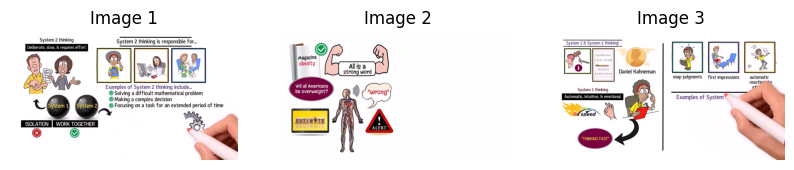


  The text chunk 2: . the stores that were there in 1 9 1 6 were not the same as the ones in 1 9 2 2 . they would still be below average , but would no longer be the bottom performers . the same insight was similar in all industries . according to se christ , medi ocr ity tends to prevail in the conduct of competitive business . what se christ was so critical of is now known


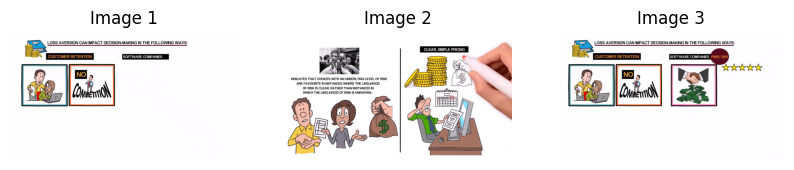


  The text chunk 3: and you 're sure to make a choice that will make you more satisfied and happier . until the next video , have fun ! hey there , super excited to dive into the fascinating world of cognitive bi ases with you today . and , you know , it 's kind of funny how we humans think we 're like so smart and rational , but the truth is we 're all suscep tible to these


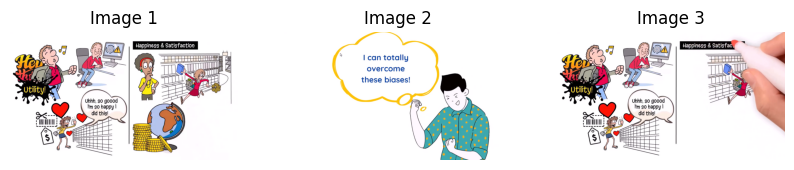


  The text chunk 4: and conclude , well , being in silicon valley is doing wonders for them . maybe we should move there too . so we would have more companies coming to silicon valley , potentially leading to more tech innovation . so we have point a , which leads to point b , which once more leads to point a . this is called the mutual cau sal ity bias or reverse cau sal ity . it is


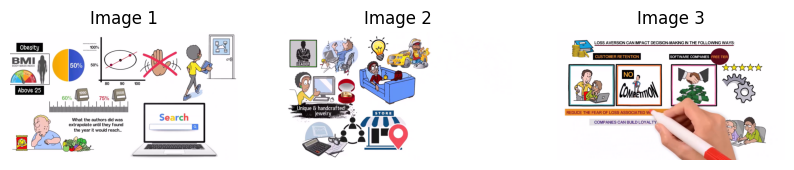


  The text chunk 5: it would reach 1 0 0 %. now , you could say , okay , dio go , this is ridiculous . no one would extra pol ate like this . to which i reply , well , go check for yourself . go to google and search for will all americans be overweight , and it should be one of the first hits . it is quite obvious that you can 't extra pol ate like


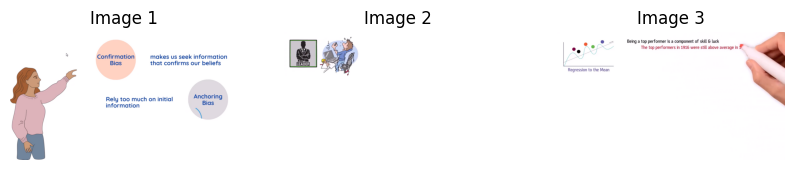

In [ ]:
# Data visualization of the text and images
for i, text_index in enumerate(random_text_indices):
  plt.figure(figsize = (10,8))

   # Displaying the text chunk
  print(f"""
  The text chunk {i + 1}: {' '.join([tokenizer.decode([token]) for token in transcription_chunks[text_index]]
  )}""")

  # Displaying similar images corresponding to the current text chunk
  for j, image_idx in enumerate(text_to_images_similarities[i]):
    image = Image.open(image_paths[image_idx])
    plt.subplot(1, 3, j + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {j + 1}")

  plt.show() # Show the plot with images and text

# Step 9 - Retrival system

In [ ]:
# Let's define a query
query = "Which cognitive biases are discussed?"

In [ ]:
# Tokenizing the query
query_tokens = tokenizer(query,
                         return_tensors = "pt",       # Return tensors in PyTorch format
                         padding = True)['input_ids'] # Pad tokens to ensure consistent length

In [ ]:
# Generate the query embeddings in the joint embedding space
# Use the CLIP model to compute text features
with torch.no_grad():
  query_embedding = model.get_text_features(
      input_ids = query_tokens  # Pass tokenized query to model
  ).cpu().numpy().flatten()     # Convert to numpy array and flatten to 1D

# Print shape of the embedding
print(f"The shape of the query embedding is {query_embedding.shape}")

The shape of the query embedding is (512,)


In [ ]:
# Compute the cosine similarity between the query and the transcripts
text_similarities = cosine_similarity([query_embedding], text_embedding_np)[0]
text_similarities

array([0.751417  , 0.3755328 , 0.466431  , 0.28114355, 0.5543842 ,
       0.5052881 , 0.35495368, 0.4351247 , 0.5266936 , 0.47594824,
       0.41741163, 0.3667145 , 0.51338005, 0.35909963, 0.4333994 ,
       0.5433452 , 0.4971303 , 0.32667798, 0.3364085 , 0.3016772 ,
       0.30833155, 0.3949973 , 0.33290058, 0.3046448 , 0.22395597,
       0.581675  , 0.39684233, 0.60200566, 0.45234892, 0.50619406,
       0.4029535 , 0.33782986, 0.31618655, 0.29989532, 0.45112422,
       0.4430092 , 0.36524537, 0.6343967 , 0.38532734, 0.52638745,
       0.21184604, 0.30226853, 0.4942199 , 0.46977955, 0.46552634,
       0.51690066, 0.3281123 , 0.42524835, 0.2794329 , 0.4582387 ,
       0.50992936, 0.38875827, 0.4672385 , 0.54820424, 0.45729563,
       0.47068715, 0.3255954 , 0.32599297, 0.41743565, 0.28364477,
       0.44868353, 0.40356845, 0.4000823 , 0.42064252, 0.35618734,
       0.6034627 , 0.19747956, 0.4039709 , 0.34761325, 0.49756712,
       0.3412641 , 0.3613535 , 0.4367265 , 0.26453775, 0.49322

In [ ]:
# Define how many chunks we want
top_k_texts = 10

# Retrieve the indices of the top-k most similar text_chunks
top_k_text_indices = text_similarities.argsort()[-top_k_texts:][::-1]
top_k_text_indices

array([128,  79,   0,  37,  92,  65,  27,  25, 123, 108])

In [ ]:
# Retrieve the closest images for each text chunk
top_k_images_indices = []
images_per_chunk = 2 # Number of top similar images to retrieve for each text chunk

for idx in top_k_text_indices:
  # Find indices of the top-k similar images for the current text chunk
  similar_images = similarities[idx].argsort()[-images_per_chunk:][::-1]
  top_k_images_indices.append(similar_images)  # Add to the list

# Remove any duplicates and limit to the top k images
top_k_images_indices = list(set([item for sublist in top_k_images_indices for item in sublist]))

# Print the number of unique image indices
print(f"The total images indices are {len(top_k_images_indices)}")

The total images indices are 18


# Step 10 - Generation system

In [ ]:
import base64

In [ ]:
# Combining the retrieved text chunks
retrieved_text = []

for idx in top_k_text_indices:
  # Decode and append each text chunk using the tokenizer
  retrieved_text.append(tokenizer.decode(transcription_chunks[idx]))

# Join all the text chunks into a single string
retrieved_text = ' '.join(retrieved_text)
retrieved_text

"have any stories on decision making that you think are thought - provoking or interesting, please do share. i love to hear other people's stories. <|endoftext|> thinker? let's do this. until next video, have fun. hey, everyone. let's talk about anchoring bias. the first case study is about how it affects real estate prices, and it is called the anchoring bias in real estate, a case study. have you ever found yourself using the first piece of information you receive as a reference point when making decisions? well <|startoftext|>are you looking to improve the way that you make decisions? do you sometimes worry that you don 't have all the tools to make the best calls? or even when you hear other people at work, you sometimes feel, hmm, that does not feel like the right decision, but at the same time, you cannot explain why. well, i think you are in the right place in instances where the unknown alternative will likely produce greater expected value. when offered choices with varying ri

In [ ]:
# Convert the images and append them
base64frames = []

for idx in top_k_images_indices:
  image_path = image_paths[idx]  # Get the path of the image

  # Open the image file in binary read mode
  with open(image_path, "rb") as image_file:
    # Encode the image file content to base64 and decode to UTF-8 string
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')
    base64frames.append(base64_image) # Append the encoded image string to the list

base64frames

['iVBORw0KGgoAAAANSUhEUgAABQAAAALQCAIAAABAH0oBAAEAAElEQVR4nOz9d5wcx3kn/n+qqnvi5rzIWESCCAQIgABBSiQlSiRFJUqWbIuWZcm2zuffnf21rZMlWdbZPp6j5JNl6WzLlnmSbWVRphhFgjmAIJFzxgKLxeYwsxM6VNXvj5rpnY3YxS4WG573a1/gYKanu6ZnFpynn3qeYlppEEIIIYQQQgghsx2/3gMghBBCCCGEEEKmAgXAhBBCCCGEEELmBAqACSGEEEIIIYTMCRQAE0IIIYQQQgiZEygAJoQQQgghhBAyJ1AATAghhBBCCCFkTqAAmBBCCCGEEELInGBd7wEQQq4NDQBaAQAzV7rYMBuYbZiYunERQgghhBByvVAATMgsxfpD3NxfR9qQQ8sRHqLAmBBCCCGEzCIUABMym7GxVTmMcTNCCCGEEEJmNPraS8jsxYbcIIQQQgghZA6jDDAhs9oooS9FxYQQQgghZI6hDDAhhBBCCCGEkDmBAmBCCCGEEEIIIXMCBcCEEEIIIYQQQuYEqgEm5HoYsECRAgCYFXvNo1b/NoWVuoW3C/cwupGelTsuH9/eCCGEEEIImbEoA0wIIYQQQgghZE6gDDAh04TJxA7JxxbmgbUavP14DcgAF+zh6nLLhBBCCCGEzCiUASaEEEIIIYQQMidQBpiQ600PzMT6gHZgWVAKALQNAMwDAAgAEGb7ggrekeTyxl7/9pz1P0uP4dd/pLWCKUtMCCGEEEJmIAqACZlm+MCQOHcnzz9GCCGEEEIIuUpMK0rlEDLlRvq1Y4AGWEHqVeXvx8B64MJ7JmL0/VAGmBBCCCGEzCKUASZkOgmiXz3yAkiEEEIIIYSQq0IZYEImQ+Gv0dB5ygN6Lxfccy0yuoQQQgghhJARUEkhIYQQQgghhJA5gaZAEzIZBqyjO+pqvcM0bzbdngv2o4c8dyK1uEPX+GUFIxzacIsQQgghhJBZir77EkIIIY

In [ ]:
# Define the model
MODEL = "gpt-4o-mini"

# Define the system prompt
system_prompt = """
You are an expert teacher that summarises visual and transcribed content
"""

In [ ]:
# Prepare the user message content
user_message_content = [
    "These are the frames from the video",                                # Initial message indicating the following content
    *map(lambda x: {"type": "image_url",                                  # Map each base64-encoded image to the appropriate format
                    "image_url": {"url": f'data:image/jpg;base64,{x}',
                                 "detail": "high"}},
         base64frames),
    {"type": "text",                                                      # Append the retrieved text as a separate message
     "text": retrieved_text}
]

In [ ]:
# Call the OpenAI API to generate a summary
response = client.chat.completions.create(
    model = MODEL, # Specify the model to use for the completion
    messages = [
        {"role": "system", "content": system_prompt}, # Provide system prompt to guide the model
        {"role": "user", "content": user_message_content}, # Provide user message content with images and text
    ],
    temperature = 0.3,  # Set the temperature to control the randomness of the output
)

In [ ]:
# Generate the response
generated_response = response.choices[0].message.content
print(generated_response)

It seems like you're sharing a series of frames from a video that discusses various concepts related to decision-making, biases, and behavioral economics. Here's a summary of the key themes and concepts presented in the frames:

1. **Obesity and BMI**: The video begins by discussing obesity, highlighting that 50% of individuals have a Body Mass Index (BMI) above 25, which categorizes them as overweight or obese.

2. **Tech Innovation**: It touches on technological advancements, particularly in Silicon Valley, showcasing elements like cloud computing, mobile devices, and cybersecurity.

3. **Risk vs. Uncertainty**: The frames illustrate the difference between risk (known probabilities) and uncertainty (unknown probabilities), using examples like gambling scenarios to explain decision-making under different conditions.

4. **Mutual Causality Bias**: This concept is introduced in relation to tech innovation, emphasizing how two variables may influence each other, complicating causal relat